# Лабораторная 13  
# Метод сеток для гиперболического уравнения  
Задание 4

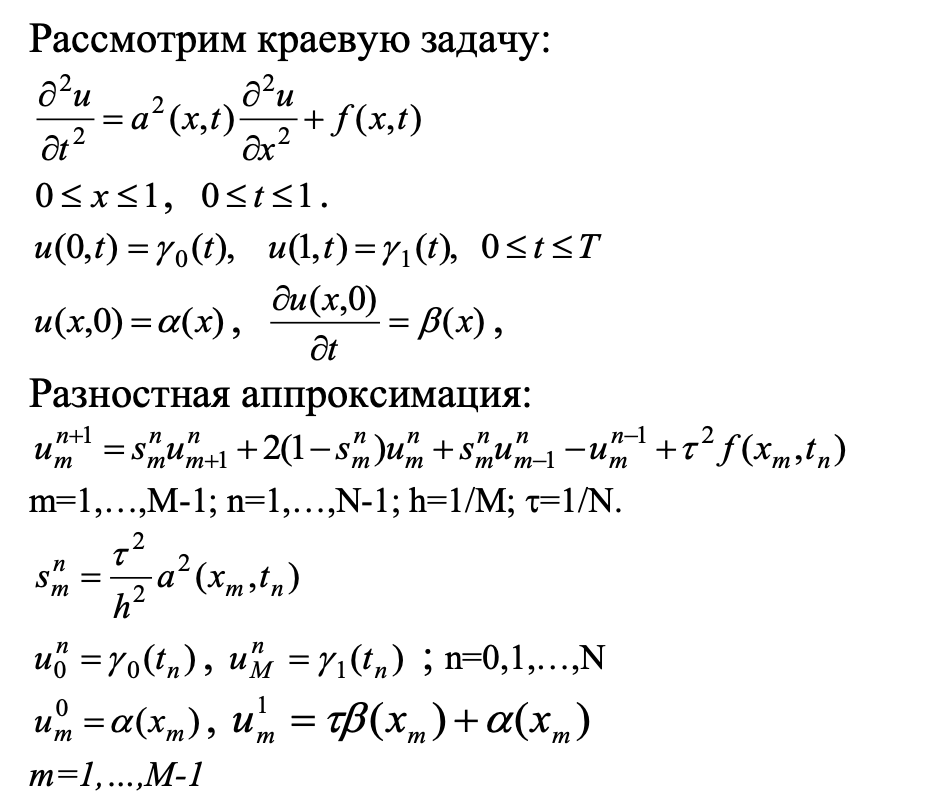

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
def u(t, x, b=1):
    return 1 / (x + b*t + 1)

def u_t(t, x, b=1):
    return -b / (x + b*t + 1) ** 2

def u_tt(t, x, b=1):
    return 2 * (b**2) / (x + b*t + 1) ** 3

def u_x(t, x, b=1):
    return -1 / (x + b*t + 1) ** 2

def u_xx(t, x, b=1):
    return 2 / (x + b*t + 1) ** 3

def f(t, x, b=1):
    return 2*(b**2 - 1) / (x + b*t + 1)**3

In [ ]:
# Начальные условия
def u0(x):
    return u(0, x)

def u1(x):
    return u_t(0, x)

# Граничные условия
def mu1(t):
    return u(t, 0)

def mu2(t):
    return u(t, 1)

In [ ]:
def solve_bv(u0, u1, mu1, mu2, f, T, L, N, M):
    t = np.linspace(0, T, N)
    x = np.linspace(0, L, M)
    tau, h = t[1] - t[0], x[1] - x[0]
    u = np.zeros((len(t), len(x)))

    for i in range(len(x)):
        u[0, i] = u0(x[i])
        u[1, i] = tau * u1(x[i]) + u[0, i]


    for n in range(2, len(t)):
        u[n, 0] = mu1(t[n])
        u[n, -1] = mu2(t[n])
        for i in range(1, len(x)-1):
            u[n, i] = (
                2*u[n-1, i] - u[n-2, i] +
                + tau**2 * (
                    (u[n-1, i+1] - 2*u[n-1, i] + u[n-1, i-1]) / h**2 + f(t[n-1], x[i])
                )
            )

    return t, x, u

In [ ]:
T = 1
L = 1

N = 1000
M = 500

t, x, result = solve_bv(u0, u1, mu1, mu2, f, T, L, N, M)

In [ ]:
T, X = np.meshgrid(t, x, indexing="ij")
expected = u(X, T)

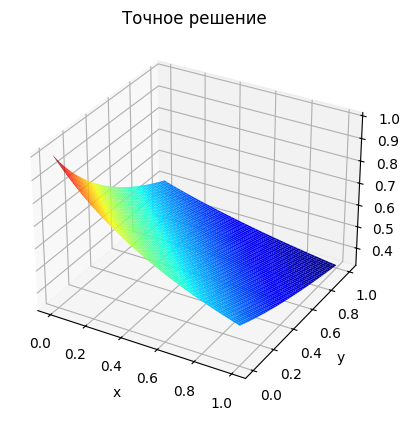

In [ ]:
fig = plt.figure()
axes = fig.add_subplot(projection='3d')

axes.set_title("Точное решение")
axes.plot_surface(X, T, expected, cmap="jet")
axes.set_xlabel("x")
axes.set_ylabel("y")
axes.set_zlabel("u")

plt.show()

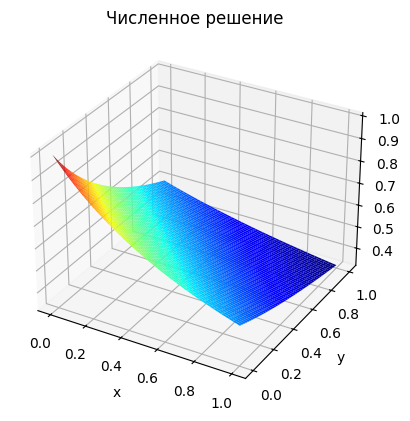

In [ ]:
fig = plt.figure()
axes = fig.add_subplot(projection='3d')

axes.set_title("Численное решение")
axes.plot_surface(T, X, result, cmap="jet")
axes.set_xlabel("x")
axes.set_ylabel("y")
axes.set_zlabel("u")

plt.show()

In [ ]:
data = {
    "x": [],
    "t": [],
    "abs_err": [],
    "rel_err": [],
}

T = 1
L = 1

N = 2000
M = 1000
stepN, stepM = N / 10, M / 10

t, x, result = solve_bv(u0, u1, mu1, mu2, f, T, L, N, M)

T, X = np.meshgrid(t, x, indexing="ij")
expected = u(X, T)

for i in range(10):
    for j in range(10):
        xi = int(i*stepM)
        tj = int(j*stepN)
        err = np.abs(result[tj, xi] - expected[tj, xi])
        data["x"].append(x[xi])
        data["t"].append(t[tj])
        data["abs_err"].append(err)
        data["rel_err"].append(abs(err / expected[tj, xi]) * 100)

df = pd.DataFrame(data)
df.head(50)

,x,t,abs_err,rel_err
0,0.0000,0.00000,0.000000,0.000000
1,0.0000,0.10005,0.000000,0.000000
2,0.0000,0.20010,0.000000,0.000000
3,0.0000,0.30015,0.000000,0.000000
4,0.0000,0.40020,0.000000,0.000000
5,0.0000,0.50025,0.000000,0.000000
6,0.0000,0.60030,0.000000,0.000000
7,0.0000,0.70035,0.000000,0.000000
8,0.0000,0.80040,0.000000,0.000000
9,0.0000,0.90045,0.000000,0.000000
